# Обработка датасета

## Чтение и описание

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("/content/Car_Insurance_Claim.csv") # считали базу данных
print(f'''
  Число объектов: {data_raw.shape[0]}
  Число признаков: {data_raw.shape[1]}
  ''')


  Число объектов: 10000
  Число признаков: 19
  


In [3]:
data_raw.head(3)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0


Одна из американских компаний по страховке автомобилей поделилась годовым отчётом с данными касательно их клиентов. Эта таблица содержит информацию о клиентах и о том, произошёл ли страховой случай, то есть пришлось ли компании выплачивать ему энную сумму.
Столбцы журнала клиентов имеют следующий вид:

*   `ID` - идентификационный номер клиента
*   `AGE` - возраст клиента
*   `GENDER` - пол клиента (М или Ж, что странно)
*   `RACE` - раса клиента (большинство или меньшинство)
*   `DRIVING_EXPERIENCE` - водительский стаж (0-9 лет, 10-19 лет и т.д.)
*   `EDUCATION` - имеющееся образование клиента
*   `INCOME` - принадлежность слою общества (например, рабочий класс)
*   `CREDIT_SCORE` - число, характеризующее кредитную способность клиента
*   `VEHICLE_OWNERSHIP` - владеет ли транспортным средством, в страховку которого клиент хочет быть включенным
*   `VEHICLE_YEAR` - возраст автомобиля (до или после января 2015)
*   `MARRIED` - в браке ли клиент
*   `CHILDREN` - есть ли дети
*   `POSTAL_CODE` - почтовый код
*   `ANNUAL_MILEAGE` - годовой пробег автомобиля
*   `VEHICLE_TYPE` - тип автотранспорта (седан (болльшего не дано) или спорткар (меньшего не дано))
*   `SPEEDING_VIOLATIONS` - сколько раз замечены нарушения скорости
*   `DUIS` - сколько раз пойман за рулем в нетрезвом виде
*   `PAST_ACCIDENTS` - попаданий в аварии
*   `OUTCOME` - произошёл / не произошёл страховой случай



**Вопрос-цель:** сможет ли машина обучиться достаточно хорошо, чтобы  определять произойдёт ли страховой случай с определённым клиентом?

## Пропущенные значения

Теперь проверим датасет на наличие пропущенных значений:

In [4]:
data_raw.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Видим столбцы `CREDIT_SCORE`, `ANNUAL_MILEAGE` с пропущенными значениями. Можно было бы просто на просто удалить строки с этими ячейками, но их достаточно много (10%), поэтому дадим им значение медианы/моды этого признака. Так как это числовые признаки, возьмём медиану. Её значения выглядят так:

In [5]:
wherk = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
data_raw[wherk].median(axis = 0)

CREDIT_SCORE          0.525033
ANNUAL_MILEAGE    12000.000000
dtype: float64

Осталось заполнить пропущенные ячейки их значением:

In [6]:
data_raw[wherk] = data_raw[wherk].fillna(data_raw[wherk].median(axis = 0), axis=0)

Теперь в базе нет пропущенных значений.

In [7]:
data_raw.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## Визуализация

### Мат. описание

Посмотрим на признаки еще раз да повнимательнее. Можно увидеть как числовые, так и категориальные признаки. Числовые признаки можно было бы нормализовать. Категориальные же признаки стоит привести именно к категориальным. Займёмся этим позже.

In [8]:
data_raw.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

Можно взглянуть на мат. описание для каждого признака:

In [9]:
data_raw.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.516718,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.130781,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Из этой таблицы следует, что клиенты подобраны весьма интересные, во весь спектр каждого из признаков. Средние и медианные значения ушли недалеко от половины максимального значения.

Посмотрим на то, сбалансирована ли выборка:

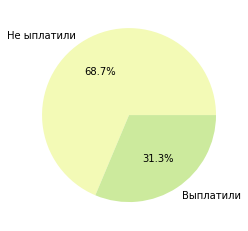

In [10]:
plt.pie(data_raw['OUTCOME'].value_counts(),
        labels = ["Не ыплатили", "Выплатили"],
        colors = sns.color_palette("YlGn"),
        autopct = '%1.1f%%')
pass

Не критично, но всё-таки разбалансировка есть.

Все диаграммы рассеивания:

In [11]:
sns.pairplot(data_raw, hue="OUTCOME", palette="viridis")
pass

  Отобразим матрицу корреляций для количественных признаков. Видим много интересных закономерностей.
  Если клиент в браке, или же если у него есть дети, то количество намотанных милей в год меньше, чем у холостяка/холостячки без детей.
  Нарушение скоростного ограничения связано с количеством попадания в аварии, а также количеством раз, когда водитель был пойман пьяным за рулём. Что собственно логично.
  Что интересно, увелечение оценки кредитоспособности влечёт (немного) за собой увеличение всяческих нарушений правил дорожного движения.
  Еще одна интересная вещь, чем больше кредитный рейтинг у клиента, тем больше вероятность того, что он владелец транспортного средства.

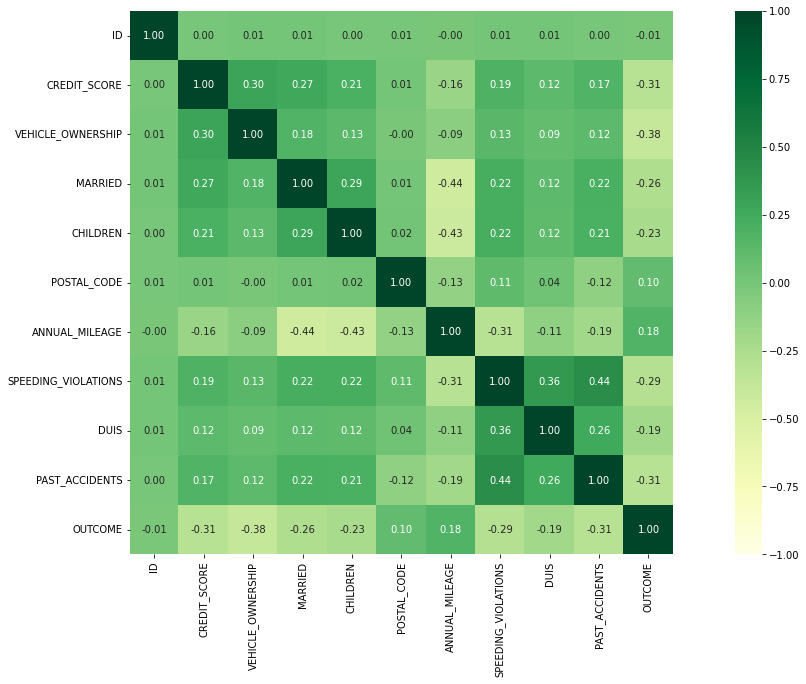

In [12]:
corr_mat = data_raw.corr()
plt.subplots(figsize=(22, 10))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='YlGn')
pass

Отобразим отдельно корреляцию относительно признака `OUTCOME`. Можно увидеть, что корреляция с `ID` и `POSTAL_CODE` мала и составляет меньше 0.1.

### Корреляция с OUTCOME

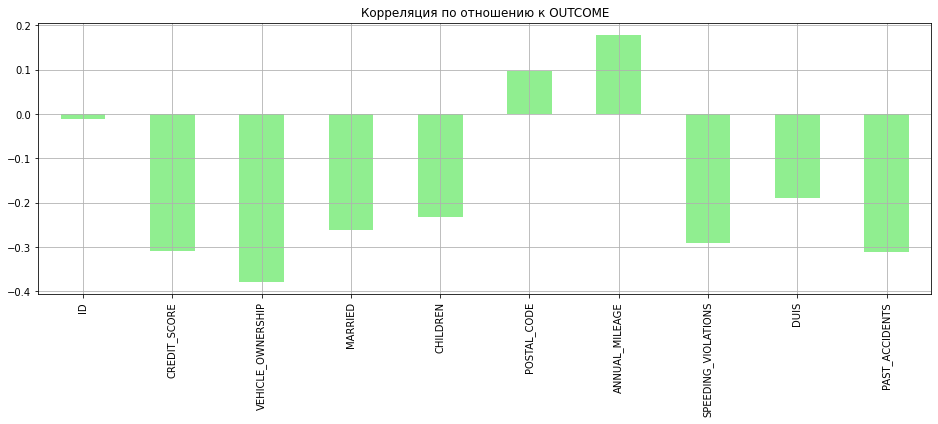

In [13]:
data_raw.drop('OUTCOME', axis=1).corrwith(data_raw['OUTCOME']).plot(kind='bar', 
                                                                 grid=True, 
                                                                 figsize=(16, 5), 
                                                                 title="Корреляция по отношению к OUTCOME",
                                                                 color="lightgreen");

В случае `ID` аж 0.01. От него совсем ничего не зависит (для всех признаков) поэтому удалим его из таблицы.

In [14]:
data_raw.drop(columns=['ID'], axis=1, inplace=True)

В страховые случаи больше попадают мужчины, чем женщины, хоть и ненамного, но всё же :)

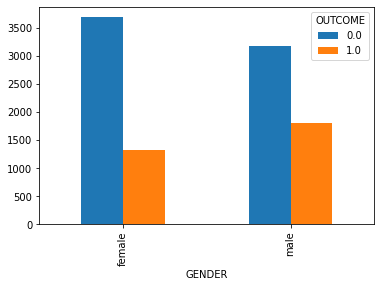

In [15]:
pd.crosstab(data_raw['GENDER'], data_raw['OUTCOME']).plot(kind = 'bar')
pass

Клиент побывал хотя бы раз в аварии -> попадать в аварии перехотелось

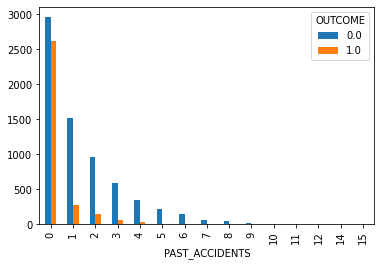

In [16]:
pd.crosstab(data_raw['PAST_ACCIDENTS'], data_raw['OUTCOME']).plot(kind = 'bar')
pass

Если клиент оказался из класса poverty, то с вероятностью около 70% он вляпается в какую-нибудь ситуацию, при которой компании придется выплачивать страховку. Возможно как-то намеренно, дабы заработать.

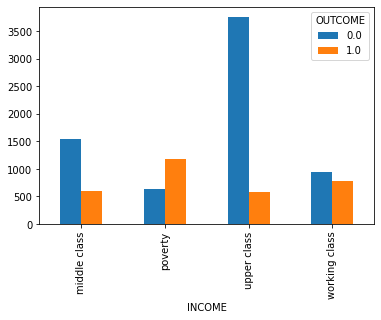

In [17]:
pd.crosstab(data_raw['INCOME'], data_raw['OUTCOME']).plot(kind = 'bar')
pass

Новички в вождении, а также молодые люди чаще попадают под страховой случай:

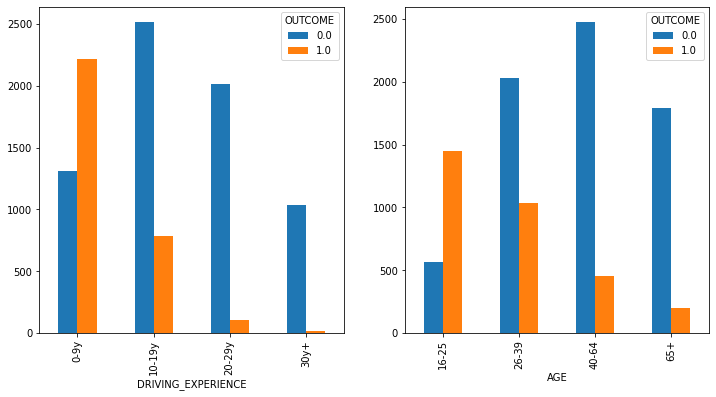

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
pd.crosstab(data_raw['DRIVING_EXPERIENCE'], data_raw['OUTCOME']).plot(kind = 'bar', ax=ax1, figsize=(12,6))
pd.crosstab(data_raw['AGE'], data_raw['OUTCOME']).plot(kind = 'bar', ax=ax2)
pass

## Обработка выбросов

Из коробок с усами можно заметить единичные выбросы:

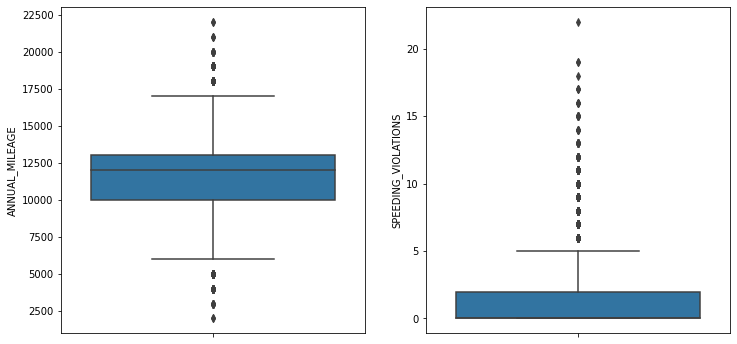

In [19]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.boxplot(y="ANNUAL_MILEAGE", data=data_raw, ax=ax1)
sns.boxplot(y="SPEEDING_VIOLATIONS", data=data_raw, ax=ax2)
pass

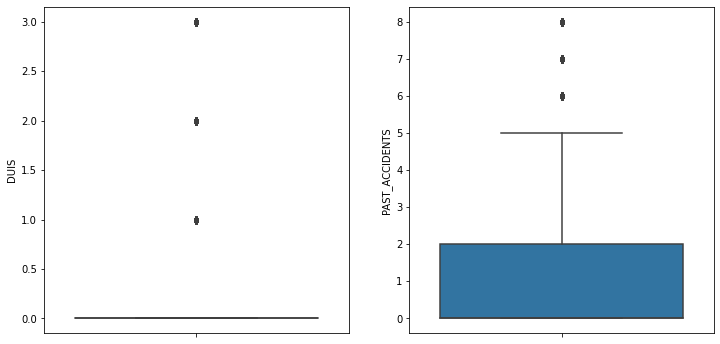

In [60]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.boxplot(y="DUIS", data=data_raw, ax=ax1)
sns.boxplot(y="PAST_ACCIDENTS", data=data_raw, ax=ax2)
pass

Избавимся от них по верхнему квантилю 0.995. В случае `ANNUAL_MILEAGE` еще и по нижнему квантилю (0.005):

In [21]:
data_raw = data_raw[(data_raw['ANNUAL_MILEAGE'] <= data_raw['ANNUAL_MILEAGE'].quantile(0.995)) &
                    (data_raw['SPEEDING_VIOLATIONS'] <= data_raw['SPEEDING_VIOLATIONS'].quantile(0.995)) & 
                    (data_raw['DUIS'] <= data_raw['DUIS'].quantile(0.995)) & 
                    (data_raw['PAST_ACCIDENTS'] <= data_raw['PAST_ACCIDENTS'].quantile(0.995)) &
                    (data_raw['ANNUAL_MILEAGE'] >= data_raw['PAST_ACCIDENTS'].quantile(0.005))]
data_raw.shape

(9898, 18)

## Типизация признаков

<!-- `ID`, `CREDIT_SCORE`, `POSTAL_CODE`, `ANNUAL_MILEAGE`, `SPEEDING_VIOLATIONS`, `DUIS`, `PAST_ACCIDENTS` - являются количественными (числовыми) признаками. -->
`GENDER`, `RACE`, `VEHICLE_OWNERSHIP`, `VEHICLE_YEAR`, `MARRIED`, `CHILDREN`, `VEHICLE_TYPE`, `OUTCOME` - являются категориальными, бинарными признаками.

`DRIVING_EXPERIENCE`, `EDUCATION`, `INCOME`, `AGE`, `POSTAL_CODE` - являются категориальными, номинальными признаками.

Остальные будут являться количественными (числовыми) признаками.

Заранее заведем список категориальных признаков, это пригодится для правильной их типизации:

In [22]:
bin_categories = ["GENDER", "RACE", "VEHICLE_OWNERSHIP", "VEHICLE_YEAR",
                  "MARRIED", "CHILDREN", "VEHICLE_TYPE", "OUTCOME"]
nom_categories = ["DRIVING_EXPERIENCE", "EDUCATION", "INCOME", "AGE", "POSTAL_CODE"]

Некоторые категориальные признаки уже являются по типу 'category'. Однако есть и 'Obj', а то и вовсе 'float':

In [23]:
for feature in data_raw.columns:
  print(f'{feature} -> {data_raw[feature].dtype.name}')

AGE -> object
GENDER -> object
RACE -> object
DRIVING_EXPERIENCE -> object
EDUCATION -> object
INCOME -> object
CREDIT_SCORE -> float64
VEHICLE_OWNERSHIP -> float64
VEHICLE_YEAR -> object
MARRIED -> float64
CHILDREN -> float64
POSTAL_CODE -> int64
ANNUAL_MILEAGE -> float64
VEHICLE_TYPE -> object
SPEEDING_VIOLATIONS -> int64
DUIS -> int64
PAST_ACCIDENTS -> int64
OUTCOME -> float64


Исправим это и приведем все категориальные признаки к типу 'category':

In [24]:
for category in (bin_categories + nom_categories):
  if data_raw[category].dtype.name != 'category':
    data_raw[category] = data_raw[category].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Готово. Проверим на одном из признаков:

In [25]:
data_raw['AGE'].dtype

CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False)

## Нормализация
Для лучшей работы многих алгоритмов машинного обучений необходима нормализация данных. Воспользуемся стандартным способом - линейным преобразованием, приводящем все значения к нулевому среднему и единичному среднеквадратичному отклонению.

In [26]:
data = data_raw.copy()

In [27]:
numb_categories = list(set(data.columns) - set(bin_categories) - set(nom_categories))
numb_categories

['SPEEDING_VIOLATIONS',
 'CREDIT_SCORE',
 'DUIS',
 'PAST_ACCIDENTS',
 'ANNUAL_MILEAGE']

In [28]:
data[numb_categories] = (data[numb_categories] - data[numb_categories].mean(axis = 0))/data[numb_categories].std(axis = 0)
data.describe()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,9.898000e+03,9.898000e+03,9.898000e+03,9.898000e+03,9.898000e+03
mean,-6.568464e-17,-5.563453e-17,-7.106863e-17,-1.435730e-18,-2.261275e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.534025e+00,-3.675170e+00,-6.841941e-01,-4.342597e-01,-6.546689e-01
25%,-6.544722e-01,-6.542461e-01,-6.841941e-01,-4.342597e-01,-6.546689e-01
50%,6.675314e-02,1.009849e-01,-6.841941e-01,-4.342597e-01,-6.546689e-01
75%,6.953707e-01,4.786003e-01,2.805001e-01,-4.342597e-01,6.365362e-01
max,3.393553e+00,2.744293e+00,5.103971e+00,5.223883e+00,4.510152e+00


## Обработка категориальных признаков

Поработаем над видом категориальных значений в итоговом датасете. Бинарные представим в виде 0 и 1. Номинальные представим в виде новых признаков с присвоенными им значениями 0 или 1.

In [29]:
for feature in bin_categories:
    data[feature] = data[feature].astype(object)
    if type(data[feature].unique()[0]) == float:
        data[feature] = data[feature].astype({feature: "int"})
    else:
        data.at[data[feature] == data[feature].unique()[0], feature] = 0
        data.at[data[feature] == data[feature].unique()[1], feature] = 1

In [30]:
data = pd.get_dummies(data, columns = nom_categories)
print(data.columns)

Index(['GENDER', 'RACE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME',
       'DRIVING_EXPERIENCE_0-9y', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'EDUCATION_high school', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_middle class', 'INCOME_poverty', 'INCOME_upper class',
       'INCOME_working class', 'AGE_16-25', 'AGE_26-39', 'AGE_40-64',
       'AGE_65+', 'POSTAL_CODE_10238', 'POSTAL_CODE_21217',
       'POSTAL_CODE_32765', 'POSTAL_CODE_92101'],
      dtype='object')


## Формирование data и target

Тут же отделим основную часть таблицы от целевой - target, которой будет являться столбец `OUTCOME`:

In [31]:
target = data['OUTCOME']
data.drop(columns=['OUTCOME'], axis=1, inplace=True)
data

,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,...,INCOME_upper class,INCOME_working class,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,POSTAL_CODE_10238,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101
0,0,0,0.860650,1,0,0,1,0.100985,0,-0.684194,...,1,0,0,0,0,1,1,0,0,0
1,1,0,-1.210232,0,1,0,0,1.611447,0,-0.684194,...,0,0,1,0,0,0,1,0,0,0
2,0,0,-0.176673,1,1,0,0,-0.276631,0,-0.684194,...,0,1,1,0,0,0,1,0,0,0
3,1,0,-2.368651,1,1,0,1,-0.276631,0,-0.684194,...,0,1,1,0,0,0,0,0,1,0
4,1,0,-0.976565,1,1,0,0,0.100985,0,0.280500,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0.507651,1,1,0,0,1.611447,0,-0.684194,...,1,0,0,1,0,0,1,0,0,0
9996,0,0,0.045368,1,0,0,1,0.100985,0,-0.201847,...,0,0,0,1,0,0,0,0,1,0
9997,1,0,-0.346190,1,1,0,1,0.856216,0,-0.684194,...,0,0,0,1,0,0,1,0,0,0
9998,0,0,-1.161164,0,1,0,1,0.478600,0,0.280500,...,0,0,0,1,0,0,1,0,0,0


# Обучение

Разделение данных на обучающую и тестовую выборки:

In [32]:
X = data
y = target
N, d = X.shape
N, d

(9898, 31)

Разобьем данные на обучающую и тестовую выборки в пропорции 9:1:

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 27)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

N_train, N_test

(8908, 990)

## Метод k-ближайших соседей (kNN)

In [35]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Переберём значения параметра k в этом алгоритме от 1 до 27. Будем вычислять ошибку кросс-валидации. Наименьшая ошибка покажет нам наилуший выбор параметра k для метода.

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
%%time
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 28)})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.18331956409815287
Оптимальное количество соседей:  17
CPU times: user 57 s, sys: 12.8 s, total: 1min 9s
Wall time: 1min


Обучим и запустим метод kNN для оптимального среди рассмотренных количества соседей best_n_neighbors = 17:

In [38]:
%%time
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))

print(f'''
Точность на обучающей выборке: {acc_train}
Точность на тестовой выборке: {acc_test}
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Точность на обучающей выборке: 0.8372249663224068
Точность на тестовой выборке: 0.8090909090909091
Ошибка на обучающей выборке: 0.16277503367759316
Ошибка на тестовой выборке: 0.19090909090909092

CPU times: user 4.63 s, sys: 855 ms, total: 5.49 s
Wall time: 4.41 s


## SVC

In [39]:
from sklearn.svm import SVC

In [40]:
%%time
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=svc.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=svc.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.1425684777727885
Ошибка на тестовой выборке: 0.16767676767676767

CPU times: user 9.44 s, sys: 55.5 ms, total: 9.5 s
Wall time: 9.47 s


## Random Forest

In [41]:
from sklearn import ensemble

In [42]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.000449034575662326
Ошибка на тестовой выборке: 0.17474747474747473

CPU times: user 1.41 s, sys: 4.45 ms, total: 1.42 s
Wall time: 1.42 s


## Extremely Randomized Trees

In [43]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=ert.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=ert.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.000449034575662326
Ошибка на тестовой выборке: 0.18787878787878787

CPU times: user 1.53 s, sys: 11.9 ms, total: 1.54 s
Wall time: 1.54 s


## AdaBoost

In [44]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test  = np.mean(y_test  != ada.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=ada.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=ada.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.14739559946115852
Ошибка на тестовой выборке: 0.1787878787878788

CPU times: user 5.86 s, sys: 74.8 ms, total: 5.94 s
Wall time: 5.93 s


## GBT

In [45]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=gbt.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=gbt.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.13718006286484058
Ошибка на тестовой выборке: 0.1595959595959596

CPU times: user 1.41 s, sys: 5.21 ms, total: 1.41 s
Wall time: 1.41 s


## Выводы о результатах классификации



*   **Метод kNN** - ошибка составила *~16.2%* на обучающей выборке и *~19%* на тестовой выборке. При выборе оптимального k = 17 (оптимальному по наименьшей ошибке кросс-валидации).
*   **SVC** - ошибка составила *~14.2%* на обучающей выборке и *~16.7%* на тестовой выборке.
*   **Random Forest** - ошибка составила *~0%* на обучающей выборке и *~17.1%* на тестовой выборке.
*   **Extremely Randomized Trees** - ошибка составила *~0%* на обучающей выборке и *~18.5%* на тестовой выборке.
*   **AdaBoost** - ошибка составила *~14.7%* на обучающей выборке и *~17.8%* на тестовой выборке.
*   **GBT** - ошибка составила *~13.7%* на обучающей выборке и *~15.9%* на тестовой выборке.



# Выделение главных компонент

**Метод главных компонент (PCA)** нужен для уменьшения времени обучения над выборкой. Качество или не пострадает, или пострадает, но незначительно.

Как мы видим, коррелированных признаков не так уж и много:

In [46]:
new_data = pd.DataFrame(data = X)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

DRIVING_EXPERIENCE_0-9y    AGE_16-25             0.678920
DRIVING_EXPERIENCE_30y+    AGE_65+               0.676773
DRIVING_EXPERIENCE_20-29y  AGE_40-64             0.638115
DRIVING_EXPERIENCE_10-19y  AGE_26-39             0.630474
CREDIT_SCORE               INCOME_upper class    0.594818
dtype: float64

Запустим метод главных компонент. Будем выбирать количество главных компонент таким образом, чтобы объясненная дисперсия была не меньше некоторого заданного уровня – 0.85.

In [47]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.85)
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(9898, 31)
(9898, 13)


In [48]:
new_data = pd.DataFrame(data = X_proj)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.425943,-1.469573,-0.338498,0.215849,-0.128183,-0.490162,0.547971,0.930879,-0.526467,-0.021811,0.387253,-0.011071,0.368820
1,-2.515518,1.070027,-0.687398,-0.102039,0.297406,-0.886241,-0.555290,0.190688,0.183991,0.312596,-0.477306,-0.564226,0.377762
2,-1.370763,-0.284134,0.402536,0.113435,-0.247452,-0.517397,0.732288,0.540985,0.154453,-0.096538,-0.114522,0.121750,-0.832071
3,-1.781791,1.102443,1.514395,0.080662,-0.023011,-0.674221,-1.025151,-0.188132,0.493608,-0.953720,0.668649,0.536118,-0.836309
4,-0.682162,1.075145,0.555920,-0.272186,0.831176,1.083537,-0.430059,-0.232660,0.787263,0.099290,0.498741,-0.275459,-0.480149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,-0.845867,-0.695122,-1.803516,-0.159610,0.232829,0.953122,-0.728022,-0.067415,0.062265,0.277648,0.475529,0.137997,-0.390125
9894,-0.629236,-0.308703,0.396946,0.329851,0.664704,1.239991,0.012339,-0.329426,0.459478,0.560798,0.323028,0.704750,0.964772
9895,-1.500537,-0.032025,-0.433014,-0.025942,0.039408,0.342242,0.597587,0.202626,0.079669,-0.854866,-0.646029,0.356188,0.066665
9896,-0.982248,1.149147,0.105406,-0.574756,0.348692,0.974595,0.377347,0.211968,-0.638546,0.497533,0.106487,-0.232014,0.173699


# Борьба с несбалансированностью классов

Напомним, что классы распределены не очень однородно:

Перед применением метода кол-во меток со значением "Выплатили": 6782
Перед применением метода кол-во меток со значением "Не выплатили": 3116


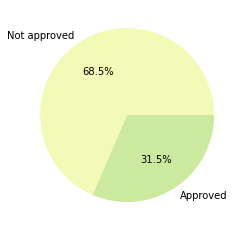

In [49]:
plt.pie(data_raw['OUTCOME'].value_counts(),
        labels = ["Not approved", "Approved"],
        colors = sns.color_palette("YlGn"),
        autopct = '%1.1f%%')
print(f'Перед применением метода кол-во меток со значением "Выплатили": {sum(target == 0)}')
print(f'Перед применением метода кол-во меток со значением "Не выплатили": {sum(target == 1)}')
pass

In [50]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_miss, y_miss = nm.fit_resample(new_data, target.ravel())

In [51]:
print(f'После применения метода кол-во меток со значением "Не выплатили": {sum(y_miss == 0)}')
print(f'После применения метода кол-во меток со значением "Выплатили": {sum(y_miss == 1)}')

После применения метода кол-во меток со значением "Не выплатили": 3116
После применения метода кол-во меток со значением "Выплатили": 3116


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, test_size = 0.1, random_state = 27)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5608, 624)

## Метод k-ближайших соседей (kNN)

In [53]:
%%time
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 28)})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.27692043486764584
Оптимальное количество соседей:  17
CPU times: user 14.6 s, sys: 176 ms, total: 14.8 s
Wall time: 14.6 s


In [54]:
%%time
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=knn.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=knn.predict(X_test))

print(f'''
Точность на обучающей выборке: {acc_train}
Точность на тестовой выборке: {acc_test}
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Точность на обучающей выборке: 0.7528530670470756
Точность на тестовой выборке: 0.7035256410256411
Ошибка на обучающей выборке: 0.2471469329529244
Ошибка на тестовой выборке: 0.296474358974359

CPU times: user 1.18 s, sys: 7.07 ms, total: 1.18 s
Wall time: 1.18 s


## SVC

In [55]:
%%time
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=svc.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=svc.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.23769614835948644
Ошибка на тестовой выборке: 0.2387820512820513

CPU times: user 4.3 s, sys: 23.3 ms, total: 4.32 s
Wall time: 4.32 s


## Random Forest

In [56]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.0007132667617689016
Ошибка на тестовой выборке: 0.27564102564102566

CPU times: user 2.1 s, sys: 22.6 ms, total: 2.12 s
Wall time: 2.12 s


## Extremely Randomized Trees

In [57]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=ert.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=ert.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.0007132667617689016
Ошибка на тестовой выборке: 0.2932692307692308

CPU times: user 1.06 s, sys: 5.65 ms, total: 1.07 s
Wall time: 1.07 s


## AdaBoost

In [58]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test  = np.mean(y_test  != ada.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=ada.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=ada.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.2346647646219686
Ошибка на тестовой выборке: 0.27403846153846156

CPU times: user 1.7 s, sys: 7.32 ms, total: 1.71 s
Wall time: 1.72 s


## GBT

In [59]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))
acc_train = accuracy_score(y_true=y_train, y_pred=gbt.predict(X_train))
acc_test = accuracy_score(y_true=y_test, y_pred=gbt.predict(X_test))

print(f'''
Ошибка на обучающей выборке: {err_train}
Ошибка на тестовой выборке: {err_test}
''')


Ошибка на обучающей выборке: 0.19900142653352354
Ошибка на тестовой выборке: 0.2564102564102564

CPU times: user 2.78 s, sys: 6.94 ms, total: 2.78 s
Wall time: 2.8 s


## Выводы о классификации после балансировки data, над которой поработали **PCA**

*  **PCA** сделал свое дело и некоторые алгоритмы работают кратно быстрее.
*  Балансировка оказала плохое влияние на ошибку во всех рассматриваемых алгоритмах. Ниже приведена таблица:
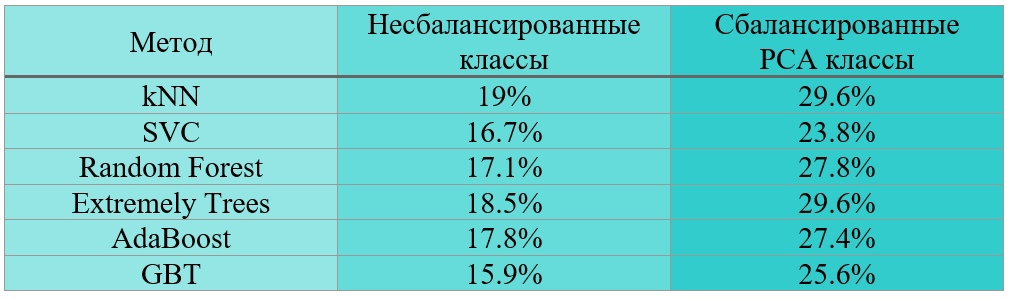

# Общие выводы

* Метод `kNN (25)` на начальной выборке показал себя хуже относительно остальных алгоритмов и выдал ошибку аж в *~19%* . 
* Наилучшее предсказание на начальной выборке получилось у `GBT`, ошибка в *~15.9%*.
* На конечной выборке (**сбалансированной и PCA обработанной**) итоговые ошибки больше чем на начальной выборке для всех классификаторов. То есть балансировка не то, что бы помогла, а наоборот всё попортила.
* Для конечной выборки поменялись лидеры. Так самую маленькую ошибку в *~23.8%* показал `SVC`. Самую большую (*~29.6%*) показал тот же `kNN`, а также `Extremely Randomized Trees`.
* **PCA** кратно уменьшил общее время обучения классификаторов (почти всех), но так как датасет объемом мал, то это не имеет смысла, так как обучение происходит относительно быстро.